In [104]:
from iterator import SmartIterator
from utils.visualization_utils import get_att_map, objdict, get_dict

import numpy as np
import os
from PIL import Image
import json
import h5py
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Specify data type here: clevr, vrd of vg

In [105]:
data_type = "vrd"

In [106]:
if data_type=="vrd":
    nrows=7
    ncols=10
    ssn_checkpoint = "/data/chami/ReferringRelationships/models/VRD/11_02_2017/ssn/16/model13-1.35.h5"
    sym_ssn_checkpoint = "/data/chami/ReferringRelationships/models/VRD/11_02_2017/sym_ssn/2/model00-1.40.h5"
    sym_ssn_checkpoint = "/data/ranjaykrishna/ReferringRelationships/temp/vrd_sym_ssn_convs3/model29-1.29.h5"
    vocab_dir = os.path.join('data/VRD')
elif data_type=="clevr":
    nrows=2
    ncols=3
    ssn_checkpoint = "/data/chami/ReferringRelationships/models/Clevr/10_19_2017/1/model03-0.06.h5"
    sym_ssn_checkpoint = "../model01-0.10.h5"
    vocab_dir = os.path.join('/data/chami/ReferringRelationships/data/Clevr/')
predicate_dict, obj_subj_dict = get_dict(vocab_dir)

## PREDICATE ONLY

In [109]:
model_weights = h5py.File(ssn_checkpoint)
params = objdict(json.load(open(os.path.join(os.path.dirname(ssn_checkpoint), "args.json"), "r")))
#params.nb_conv_att_map = params.nb_conv_move_map
conv_filters = {}
for i in range(params.num_predicates):
    predicate = predicate_dict[i]
    conv_filters[predicate] = []
    for j in range(params.nb_conv_att_map):
        conv_weights_name = "conv{}-predicate{}-0".format(j, i)
        conv_filters[predicate] += [model_weights[conv_weights_name][conv_weights_name]['kernel:0'][()].sum(axis=2,keepdims=True).sum(axis=3,keepdims=True).reshape(
    (params.conv_predicate_kernel, params.conv_predicate_kernel))]
    conv_filters[predicate] = np.array(conv_filters[predicate])

In [35]:
#methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
interp_method = "spline36"
cmap_0 = sns.cubehelix_palette(light=0.9, as_cmap=True, dark=0.3)
cmap_1 = sns.light_palette("navy", as_cmap=True)
cmap_2 = sns.cubehelix_palette(8, start=2, rot=0, dark=0.3, light=.95, reverse=True, as_cmap=True)

KeyError: 'on'

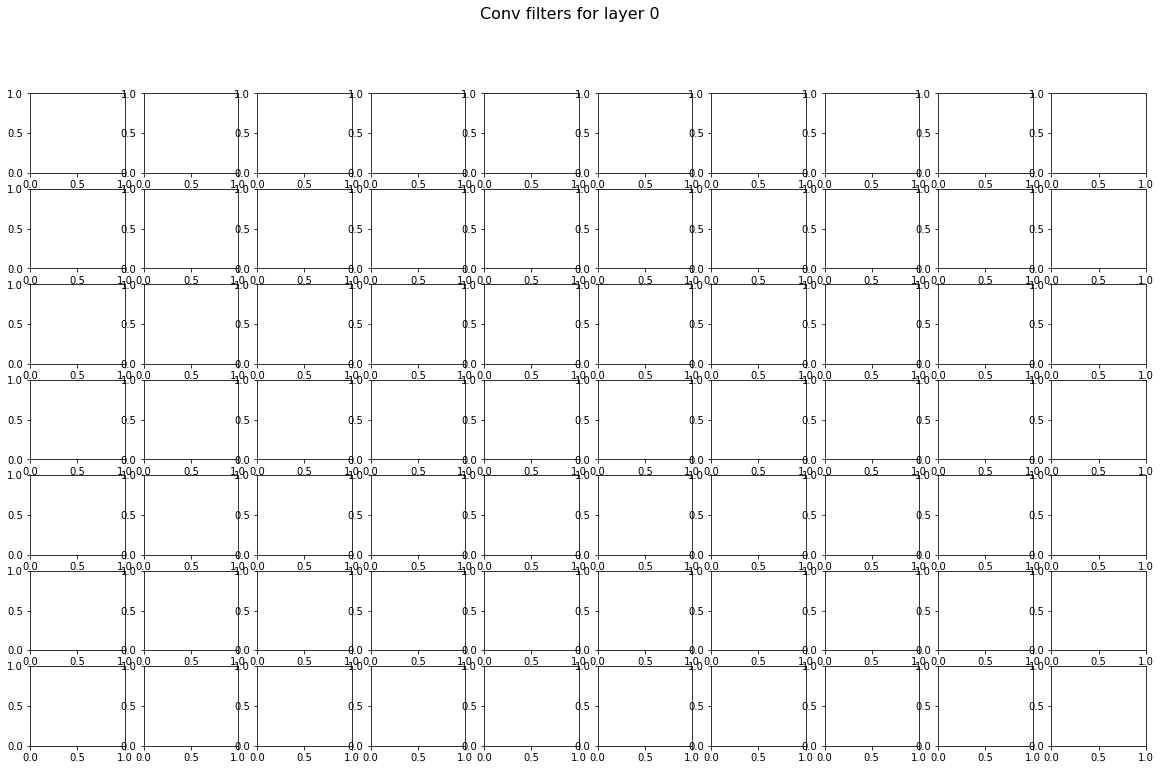

In [36]:
layer = 0
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,12))
fig.suptitle("Conv filters for layer {}".format(layer), fontsize=16)
idx = 0
for i in range(nrows):
    for j in range(ncols):
        predicate = predicate_dict[idx]
        ax = axs[i,j]
        im = np.uint8(conv_filters[predicate][layer]*255)
        plot = ax.imshow(im, interpolation=interp_method, cmap=cmap_0)
        ax.set_title(predicate_dict[idx])
        ax.axis("off")
        idx += 1
fig.colorbar(plot, ax=axs.ravel().tolist())

## PREDICATE AND INVERSE PREDICATE

In [37]:
model_weights = h5py.File(sym_ssn_checkpoint)
params = objdict(json.load(open(os.path.join(os.path.dirname(sym_ssn_checkpoint), "args.json"), "r")))
conv_filters = {}
inv_conv_filters = {}
for i in range(params.num_predicates):
    predicate = predicate_dict[i]
    conv_filters[predicate] = []
    inv_conv_filters[predicate] = []
    for j in range(params.nb_conv_att_map):
        conv_weights_name = "conv{}-predicate{}-0".format(j, i)
        conv_filters[predicate] += [model_weights[conv_weights_name][conv_weights_name]['kernel:0'][()].reshape(
    (params.conv_predicate_channels, params.conv_predicate_kernel, params.conv_predicate_kernel)).mean(axis=0)]
        inv_conv_weights_name = "conv{}-predicate{}-1".format(j, i)
        inv_conv_filters[predicate] += [model_weights[inv_conv_weights_name][inv_conv_weights_name]['kernel:0'][()].reshape(
    (params.conv_predicate_channels, params.conv_predicate_kernel, params.conv_predicate_kernel)).mean(axis=0)]
    conv_filters[predicate] = np.array(conv_filters[predicate])
    inv_conv_filters[predicate] = np.array(inv_conv_filters[predicate])

ValueError: cannot reshape array of size 625 into shape (5,5,5)

'eat'

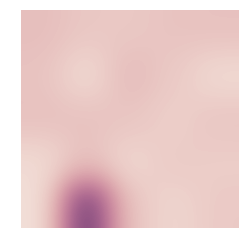

In [103]:
k = np.random.randint(70)
im = np.uint8(model_weights['conv0-predicate{}-0'.format(k)]['conv0-predicate{}-0'.format(k)]['kernel:0'][()][:,:,0,:].max(axis=2)*255)
plt.imshow(im, interpolation="gaussian", cmap=cmap_0)
plt.axis('off')
predicate_dict[k]

In [91]:
model_weights['conv0-predicate{}-0'.format(k)]['conv0-predicate{}-0'.format(k)]['kernel:0'][()].shape

(5, 5, 1, 5)

In [63]:
model_weights['conv0-predicate0-0']['conv0-predicate0-0']['kernel:0'][()][:,:,0,0]

array([[  1.77834719e-01,   9.44186077e-02,   1.49764016e-01,
          7.65960440e-02,  -9.75708291e-02],
       [ -2.97639258e-02,  -4.96445559e-02,  -8.93807784e-02,
         -9.58320219e-03,   9.62866396e-02],
       [  3.89349684e-02,   1.18564576e-01,  -8.14903826e-02,
         -5.39129600e-02,   3.14962999e-05],
       [  4.02402580e-02,   9.91543084e-02,  -4.20445129e-02,
          1.38690814e-01,  -1.02111651e-02],
       [  1.92605302e-01,   4.50309813e-02,   1.80427864e-01,
         -2.36827970e-01,  -5.11425734e-02]], dtype=float32)

In [ ]:
fig, axs = plt.subplots(nrows=nrows*2, ncols=ncols, figsize=(20,22))
fig.suptitle("Averaged conv and inverse conv filters for all layers", fontsize=16)
idx = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axs[2*i, j]
        predicate = predicate_dict[idx]
        im = np.uint8(conv_filters[predicate].mean(axis=0)*255)
        plot = ax.imshow(im, interpolation=interp_method, cmap=cmap_1)
        ax.set_title(predicate_dict[idx])
        ax.axis("off")
        ax = axs[2*i+1, j]
        im = np.uint8(inv_conv_filters[predicate].mean(axis=0)*255)
        plot = ax.imshow(im, interpolation=interp_method, cmap=cmap_0)
        ax.set_title("NOT {}".format(predicate_dict[idx]))
        ax.axis("off")
        idx += 1